In [27]:
!pip install pandas numpy seaborn scikit-learn matplotlib

In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [37]:
#Data Cleaning
df = df.dropna()
df = df.select_dtypes(include = [np.number]) #keep only numberic data

In [38]:
#Feature Engineering

#Drop the Unnamed column
df.drop(["Unnamed: 0"], axis=1, inplace=True)

In [39]:
import math

def eculidian_distance(lat1, lon1, lat2, lon2):
    return math.sqrt((lat2 - lat1)**2 + (lon2 - lon1)**2)

df["distance"] = df.apply(
    lambda row : eculidian_distance(
        row["pickup_latitude"],
        row["pickup_longitude"],
        row["dropoff_latitude"],
        row["dropoff_longitude"]
    ), axis=1
)

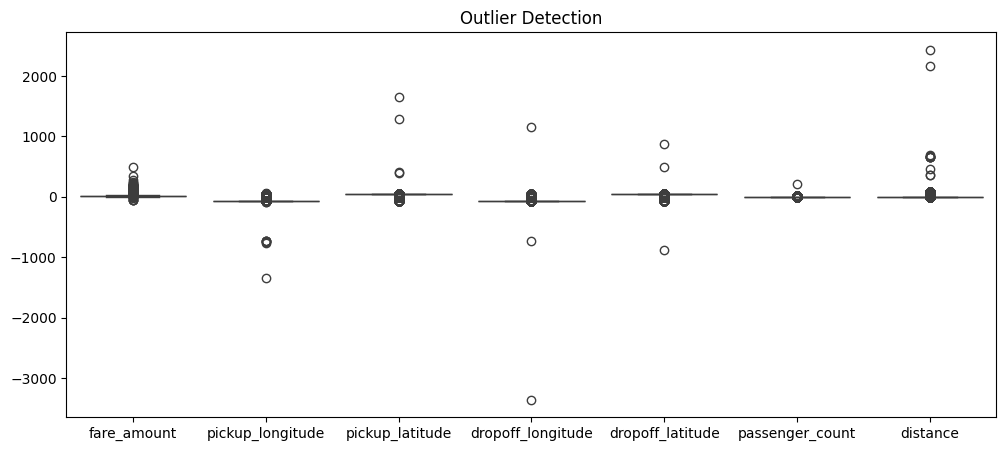

In [41]:
plt.figure(figsize=(12,5))
sns.boxplot(data=df)
plt.title("Outlier Detection")
plt.show()

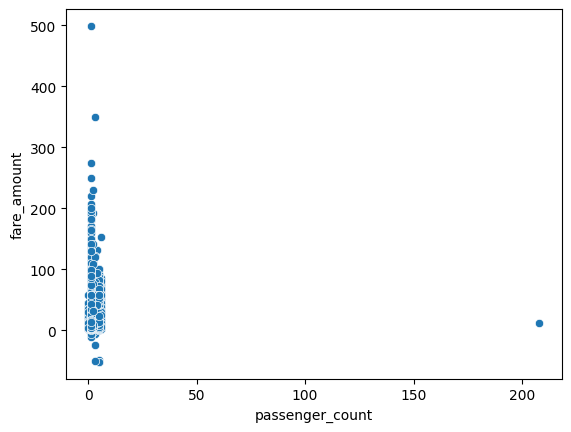

In [43]:
sns.scatterplot(df, y="fare_amount", x="passenger_count")
df = df[df["passenger_count"]<10]

In [44]:
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    IQR = q3 - q1
    df = df[(df[col] >= q1 - 1.5*IQR) & (df[col] <= q3 + 1.5*IQR)]

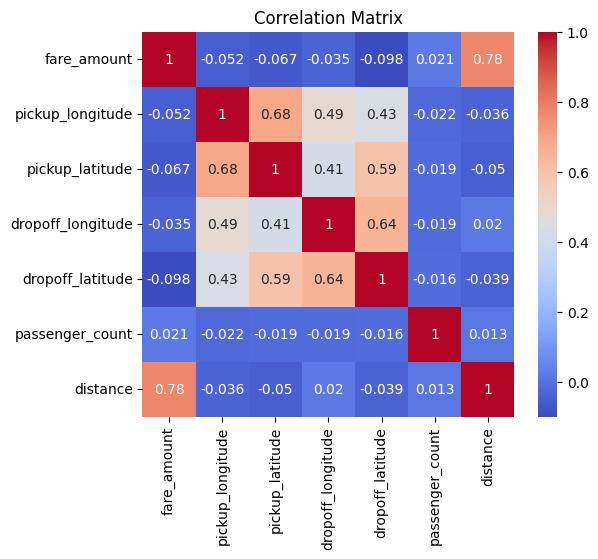

In [46]:
#Co-relation

plt.figure(figsize=(6,5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#train-test-split
X = df.drop("fare_amount", axis=1)
y = df["fare_amount"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Standardize the splits
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [49]:
#Linear Regression
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)

#predict
y_pred_lr = model.predict(X_test_scaled) 

In [50]:
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error

print("R2 Score: ", r2_score(y_test, y_pred_lr))
print("RMSE Score: ", root_mean_squared_error(y_test, y_pred_lr))

R2 Score:  0.6007793577729518
RMSE Score:  2.237507145049535


In [53]:
#Random forrest
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train_scaled, y_train)

y_pred_rf = model.predict(X_test_scaled)

In [54]:
print("R2 Score: ", r2_score(y_test, y_pred_rf))
print("RMSE Score: ", root_mean_squared_error(y_test, y_pred_lr))


R2 Score:  0.6467043953053493
RMSE Score:  2.237507145049535
